# K-means

K-means is a clustering algorithm. Given a set of points, it divides them in cluster is a smart way. Let's see:

In [298]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

This is our data:

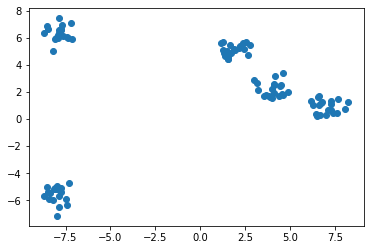

In [299]:
# Trick to generate clustered data (although without labels)
points, _ = make_blobs(centers=5, cluster_std=0.5)

# Plot, please
plt.scatter(points[:, 0], points[:, 1])
plt.show()

Let's use k-means:

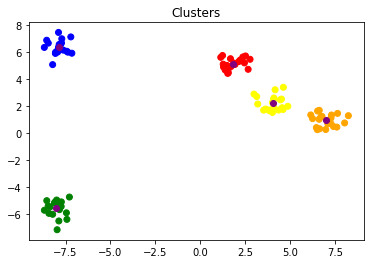

In [300]:
kmeans = KMeans(n_clusters=5)

# It fits and predicts the labels for the points
labels = kmeans.fit_predict(points)

# Give me the centroids
centroids = kmeans.cluster_centers_

# Trick to color the clusters
colormap = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'orange'}
colors = list(map(lambda x: colormap[x], labels))

# Plot for me, please
plt.scatter(points[:, 0], points[:, 1], color=colors)
plt.scatter(centroids[:, 0], centroids[:, 1], color='purple')
plt.title('Clusters')
plt.show()

But what does this algorithm do? Well, it separates the points in 5 sets, with the condition that the sum of the mean squared errors of the points related to their centroids is mininum.

It does that this way:

```
randomly choose 5 centroids
while not converge
    cluster the points in relation to the centroid they are nearest to
    calculate each cluster centroid```
    
Let's implement it!

In [301]:
def distance(a, b):
    '''
    Euclidean distance between two points a and b.
    '''
    
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    
def random_centroids(data, k):
    '''
    Calculate random centroids. It chooses k random points.
    '''
    
    indices = np.arange(np.shape(data)[0])
    np.random.shuffle(indices)
    indices = indices[0:k]
    return points[indices]

def calculate_centroids(data, labels, k):
    '''
    Calculate the new centroids based on the labels.
    It's basically the mean of the points in the same label.
    '''
    
    centroids = np.zeros((k, 2))
    for i, point in enumerate(data):
        centroids[int(labels[i])][0] += point[0]
        centroids[int(labels[i])][1] += point[1]
    for j, centroid in enumerate(centroids):
        if len(labels[labels==j]) != 0:
            centroids[j][0] /= len(labels[labels==j])
            centroids[j][1] /= len(labels[labels==j])
    return centroids        

def cluster_it(data, centroids):
    '''
    Each point is labeled acording to the nearest centroid.
    '''
    
    distances = np.zeros((np.shape(data)[0], np.shape(centroids)[0]))
    labels = np.zeros(np.shape(data)[0])
    for i, point in enumerate(data):
        for j, centroid in enumerate(centroids):
            distances[i][j] = distance(point, centroid)  # Distance between points and centroids (all of them)
        labels[i] = np.argmin(distances[i])  # The point is labeled according to the nearest centroid
    return labels

def plot(labels, points):
    '''
    Plot of the results.
    '''
    
    colormap = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'orange'}
    colors = list(map(lambda x: colormap[x % 5], labels))
    plt.scatter(points[:, 0], points[:, 1], color=colors)
    plt.title('Clusters')
    plt.show()
    
def its_close(old, new, eps):
    '''
    Check convergence.
    '''
    
    diff = np.sum(np.fabs(old[:, 0] - new[:, 0])) + np.sum(np.fabs(old[:, 1] - new[:, 1]))
    if diff < eps:
        return 1
    return 0
    
    
def k_means(data, k, eps=1e-10, max_iterations=10000):
    '''
    Implement basic k-means clustering algorithm.
    '''
    
    centroids = random_centroids(data, k)  # Random centroids    
    labels = np.zeros(np.shape(data)[0])    
    for i in range(max_iterations):  # The iteration        
        labels = cluster_it(data, centroids)  # Calculate the labels based on the centroids        
        old_centroids = np.copy(centroids)  # Save a copy for checking convergence
        centroids = calculate_centroids(data, labels, k)  # Calculate new centroids
        if its_close(old_centroids, centroids, eps):  # Checking convergence 
            print('Clustering ended with {} iterations.'.format(i))
            break
    plot(labels, data)
    return labels, centroids

Clustering ended with 6 iterations.


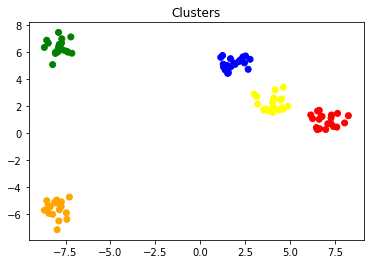

In [302]:
_, _ = k_means(points, 5)